<a href="https://colab.research.google.com/github/djyamunaq/Sample-and-Search-Return/blob/main/Search_and_Sample_Return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import urllib.request as urllib2
import numpy as np
import cv2
from math import cos, sin, pi

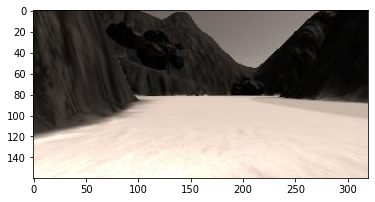

In [ ]:
# Define the filename, read and plot the image
filename = 'sample.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

In [ ]:
# Import the "numpy" package for working with arrays
print(image.dtype, image.shape, np.min(image), np.max(image))
# uint8 (160, 320, 3) 0 255

uint8 (160, 320, 3) 0 255


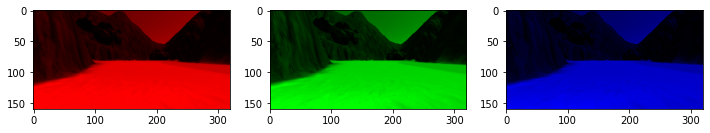

In [ ]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show() 

In [ ]:
# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ####### TODO 
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    size_x = img.shape[1]
    size_y = img.shape[0]
    binary_image = np.zeros([size_y, size_x])

    # Apply the thresholds for RGB and 
    # Naive approach
    for i in range(0, size_y):
      for j in range(0, size_x):
        pixel = img[i][j]
        if pixel[0] > rgb_thresh[0] and pixel[1] > rgb_thresh[1] and pixel[2] > rgb_thresh[2]:
          binary_image[i][j] = 1

    # assign 1's where threshold was exceeded
    return binary_image

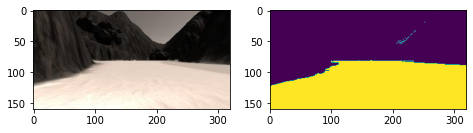

In [ ]:
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
binary_image = color_thresh(image, (150, 150, 150))
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(binary_image)
plt.show()

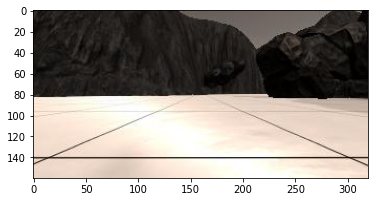

In [ ]:
%matplotlib inline
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)
plt.show() 

In [ ]:
# Define 4 source points, in this case, the 4 corners of a grid cell in the image above.
# Define 4 destination points (must be listed in the same order as source points!).
# Use cv2.getPerspectiveTransform() to get M, the transform matrix.
# Use cv2.warpPerspective() to apply M and warp your image to a top-down view.

def perspect_transform(img):

    # Get transform matrix using cv2.getPerspectivTransform()
    source = np.float32([[200, 96], [119, 96], [13, 140], [302, 140]])
    destination = np.float32([[160, 150], [150, 150], [150, 160], [160, 160]]) 
    M = cv2.getPerspectiveTransform(source, destination)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
# source = np.float32([[200, 96], [119, 96], [13, 140], [302, 140]])
# destination = np.float32([[160, 150], [150, 150], [150, 160], [160, 160]])      

# warped = perspect_transform(image, source, destination)
# plt.imshow(warped)
# plt.show() 

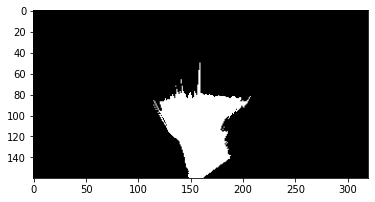

In [ ]:
# Read in the same sample image as before
image = mpimg.imread('sample.jpg')

# Assume you have already defined perspect_transform() and color_thresh()
warped = perspect_transform(image)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))

# Plot the result
plt.imshow(colorsel, cmap='gray')
plt.show() 

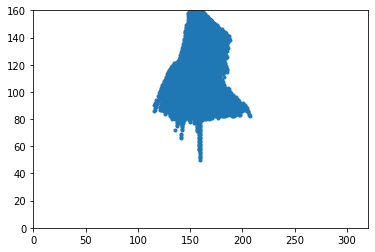

In [ ]:
ypos, xpos = colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show() 

In [ ]:
def rover_coords(binary_img):
    ypos, xpos = binary_img.nonzero()

    pos = np.ones((len(xpos), 3))
    pos[:, 0] = xpos
    pos[:, 1] = ypos
    pos = np.transpose(pos)
    # Convert xpos and ypos to rover-centric coordinates
    
    # Transformation Matrix from World Frame to Robot Frame
    T = np.array([[0, -1, 160], 
                  [1, 0, -160], 
                  [0, 0, 1]])

    t_pos = np.dot(T, pos)
    
    x_pixel = t_pos[0, :]  
    y_pixel = t_pos[1, :]

    return x_pixel, y_pixel

In [ ]:
image = mpimg.imread('./angle-example.jpg')
binary_image = color_thresh(image, [160, 160, 160])
ypos, xpos = binary_image.nonzero()

len(xpos)

15450

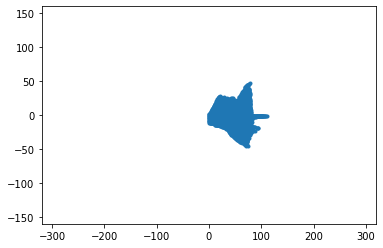

In [ ]:
xpos, ypos = rover_coords(colorsel)
plt.plot(xpos, ypos, '.')
plt.xlim(-320, 320)
plt.ylim(-160, 160)
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[110. 109. 108. ...   1.   1.   1.]
[-1. -1. -1. ...  0.  1.  2.]
[array([110.25637915]) array([110.19266384]) array([110.12894852]) ...
 array([103.38848354]) array([103.46555726]) array([103.54263098])]
[array([43.71939637]) array([43.79647009]) array([43.87354382]) ...
 array([52.18414739]) array([52.24786271]) array([52.31157802])]
wXpos = [110 110 110 ... 103 103 103] wYpos = [43 43 43 ... 52 52 52]
Xpos = [103.32476822] Ypos = [52.26122111] Yaw = [309.57986314]


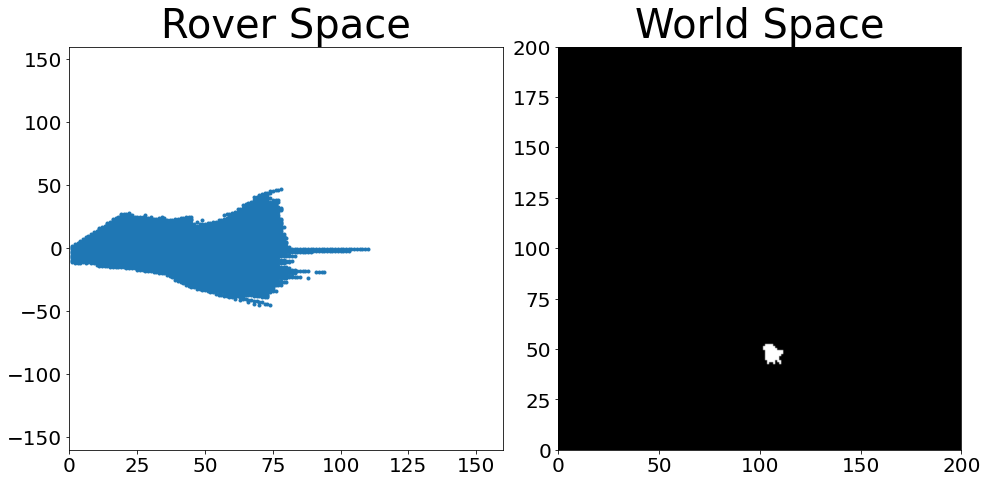

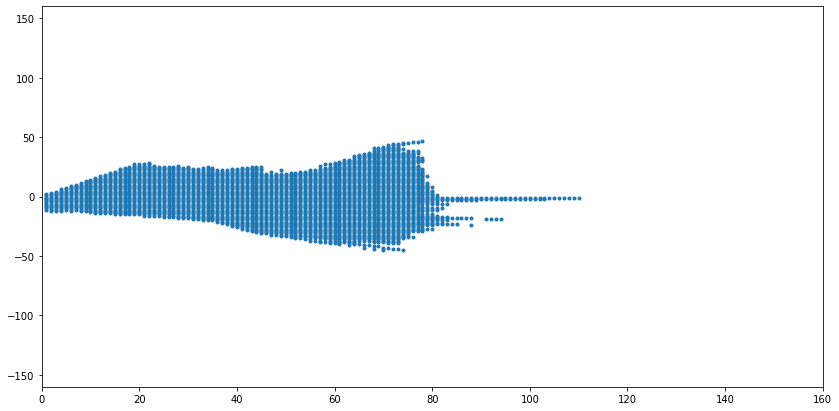

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the sample image
image = mpimg.imread('sample.jpg')

# Rover yaw values will come as floats from 0 to 360
# Generate a random value in this range
# Note: you need to convert this to radians
    # before adding to pixel_angles
rover_yaw = np.random.random(1)*360

# Generate a random rover position in world coords
# Position values will range from 20 to 180 to 
# avoid the edges in a 200 x 200 pixel world
rover_xpos = np.random.random(1)*160 + 20
rover_ypos = np.random.random(1)*160 + 20

# Note: Since we've chosen random numbers for yaw and position, 
# multiple run of the code will result in different outputs each time.

def pix_to_world(xpix, ypix, xpos, ypos, yaw, world_size, scale):
    pos = np.ones((len(xpix), 3))
    pos[:, 0] = xpix
    pos[:, 1] = ypix
    pos = np.transpose(pos)
    yaw = pi*yaw/180

    # Transformation Matrix from Robot Frame to World Frame
    T = np.array([[cos(yaw)/scale, -sin(yaw)/scale, xpos], 
                  [sin(yaw)/scale, cos(yaw)/scale, ypos], 
                  [0, 0, 1]])

    t_pos = np.dot(T, pos)

    x_pixel = t_pos[0, :]  
    y_pixel = t_pos[1, :]

    # Clip to world_size
    x_pix_world = np.clip(np.int_(x_pixel), 0, world_size - 1)
    y_pix_world = np.clip(np.int_(y_pixel), 0, world_size - 1)
    
    print(xpix)
    print(ypix)
    print(x_pixel)
    print(y_pixel)

    # Return the result
    return x_pix_world, y_pix_world

# No need to modify code below here
# Perform warping and color thresholding
##########
# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])
warped = perspect_transform(image)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Extract navigable terrain pixels
xpix, ypix = rover_coords(colorsel)

# Generate 200 x 200 pixel worldmap
worldmap = np.zeros((200, 200))
scale = 10
# Get navigable pixel positions in world coords
x_world, y_world = pix_to_world(xpix, ypix, rover_xpos, 
                                rover_ypos, rover_yaw, 
                                worldmap.shape[0], scale)
print('wXpos =', x_world, 'wYpos =', y_world)

# Add pixel positions to worldmap
worldmap[y_world, x_world] += 1
print('Xpos =', rover_xpos, 'Ypos =', rover_ypos, 'Yaw =', rover_yaw)
# Plot the map in rover-centric coords

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
f.tight_layout()
ax1.plot(xpix, ypix, '.')
ax1.set_title('Rover Space', fontsize=40)
ax1.set_ylim(-160, 160)
ax1.set_xlim(0, 160)
ax1.tick_params(labelsize=20)

ax2.imshow(worldmap, cmap='gray')
ax2.set_title('World Space', fontsize=40)
ax2.set_ylim(0, 200)
ax2.tick_params(labelsize=20)
ax2.set_xlim(0, 200)


plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)
#plt.show() # Uncomment if running on your local machine

plt.subplots(1, figsize=(14, 7))
[xpix, ypix]
ypos, xpos = colorsel.nonzero()
plt.plot(xpix, ypix, '.')
plt.xlim(0, 160)
plt.ylim(-160, 160)
plt.show() 

In [ ]:
# Define a function to convert from cartesian to polar coordinates
def to_polar_coords(xpix, ypix):
    # Calculate distance to each pixel
    dist = np.sqrt(xpix**2 + ypix**2)
    # Calculate angle using arctangent function
    angles = np.arctan2(ypix, xpix)
    return dist, angles

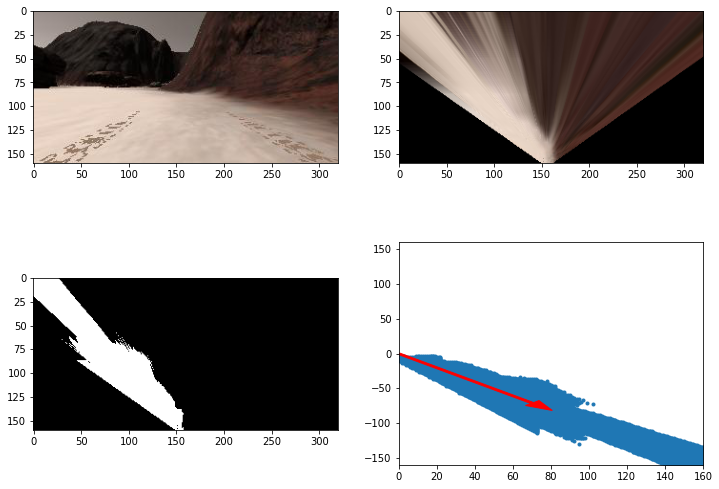

In [ ]:
image = mpimg.imread('/content/angle-example.jpg')
warped = perspect_transform(image) # Perform perspective transform
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160)) # Threshold the warped image
xpix, ypix = rover_coords(colorsel)  # Convert to rover-centric coords
distances, angles = to_polar_coords(xpix, ypix) # Convert to polar coords
avg_angle = np.mean(angles) # Compute the average angle

# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(colorsel, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(avg_angle)
y_arrow = arrow_length * np.sin(avg_angle)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
plt.show()

In [ ]:
avg_angle_degrees = avg_angle * 180/np.pi
steering = np.clip(avg_angle_degrees, -15, 15)
print(avg_angle_degrees)
print(steering)

-45.34381762368213
-15.0


10
